# Global Data Field Jobs 2023 Analysis

#### This notebook aims to explore trends and get insights about data related jobs. 
#### The primary goal is to gain insights that offer improved guidance on global pay trends. This information is valuable for newcomers, experienced professionals, hiring managers, recruiters, and even startup founders or individuals looking to change careers, enabling them to make better-informed decisions.
#### The dataset utilized in this analysis was retrieved from the page https://ai-jobs.net/salaries/download/


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file and creating pandas dataframe
df=pd.read_csv("./DataJobsalaries.csv")

### Data Dictionary
work_year: The year the salary was paid; 

experience_level: The experience level in the job during the year;

employment_type: The type of employement for the role;

job_title: The role worked in during the year;

salary: The total gross salary amount paid;

salary_currency: The currency of the salary paid;

salary_in_usd: The salary in USD;

employee_residence: Employee's primary country of residence in during the work year;

remote_ratio: The overall amount of work done remotely;

company_location: The country of the employer's main office or contracting branch;

company_size: The average number of people that worked for the company during the year.

### Exploring Data Frame

In [3]:
# getting first 5 rows of data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,CT,AI Engineer,50000,USD,50000,CZ,100,CA,L
1,2023,MI,FT,Data Scientist,60000,EUR,64781,ES,100,ES,L
2,2023,EN,FT,Data Scientist,53000,EUR,57223,NL,50,NL,L
3,2023,MI,FL,Data Science Consultant,21000,USD,21000,PK,100,LU,S
4,2023,MI,FT,Data Analyst,135000,USD,135000,US,0,US,M


In [4]:
# getting last 5 rows of data
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8811,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8812,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8813,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8814,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8815,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
# getting information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8816 non-null   int64 
 1   experience_level    8816 non-null   object
 2   employment_type     8816 non-null   object
 3   job_title           8816 non-null   object
 4   salary              8816 non-null   int64 
 5   salary_currency     8816 non-null   object
 6   salary_in_usd       8816 non-null   int64 
 7   employee_residence  8816 non-null   object
 8   remote_ratio        8816 non-null   int64 
 9   company_location    8816 non-null   object
 10  company_size        8816 non-null   object
dtypes: int64(4), object(7)
memory usage: 757.8+ KB


In [6]:
# getting the summary of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,8816.0,2022.737750,0.542225,2020.0,2023.0,2023.0,2023.0,2023.0
salary,8816.0,174630.242400,455781.808241,14000.0,105500.0,144100.0,190000.0,30400000.0
salary_in_usd,8816.0,149409.253857,64046.556033,15000.0,105000.0,142200.0,185900.0,450000.0
remote_ratio,8816.0,38.719374,48.071890,0.0,0.0,0.0,100.0,100.0


### Data Cleaning

Checking the shape of our dataset.

In [7]:
df.shape

(8816, 11)

Checking for any missing or null values

In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop('salary',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8816 entries, 0 to 8815
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8816 non-null   int64 
 1   experience_level    8816 non-null   object
 2   employment_type     8816 non-null   object
 3   job_title           8816 non-null   object
 4   salary_currency     8816 non-null   object
 5   salary_in_usd       8816 non-null   int64 
 6   employee_residence  8816 non-null   object
 7   remote_ratio        8816 non-null   int64 
 8   company_location    8816 non-null   object
 9   company_size        8816 non-null   object
dtypes: int64(3), object(7)
memory usage: 688.9+ KB


checking for duplicate values

In [10]:
df.duplicated().sum()

3681

Considering that we have a lot of duplicate values, let us remove the duplicates to get clean data and ensure good data quality

In [11]:
df.drop_duplicates(inplace=True)

Checking the dataset shape again

In [12]:
df.shape

(5135, 10)

### Data Analysis

Distribution of Work Year

In [13]:
work_year_chart = df.work_year.value_counts(normalize=True).head(10) * 100
pd.DataFrame({'Job Title': work_year_chart.index, 'Percentage': work_year_chart.values})

,Job Title,Percentage
0,2023,72.677702
1,2022,21.655307
2,2021,4.206426
3,2020,1.460565


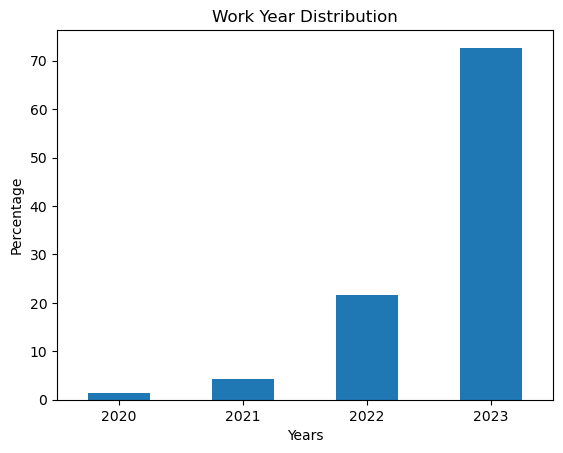

In [14]:
work_year_chart.sort_index().plot(kind='bar')
plt.title('Work Year Distribution')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Identifying popular Jobs in 2023

In [15]:
len(df.job_title.value_counts())

123

In [16]:
Job_Title_chart = df[df.work_year == 2023].job_title.value_counts(normalize=True).head(10) * 100
pd.DataFrame({'Job Title': Job_Title_chart.index, 'Percentage': Job_Title_chart.values})

,Job Title,Percentage
0,Data Engineer,19.426581
1,Data Scientist,18.354770
2,Data Analyst,14.013934
3,Machine Learning Engineer,10.450161
4,Analytics Engineer,3.992497
5,Research Scientist,3.242229
6,Data Architect,2.518757
7,Research Engineer,2.197213
8,ML Engineer,1.902465
9,Applied Scientist,1.848875


As per the dataset, three most popular data-related jobs are as follows:

Data Engineer (19.43%)

Data Scientist (18.35%)

Data Analyst (14%)

                        Job Title  Percentage
0                   Data Engineer   19.426581
1                  Data Scientist   18.354770
2                    Data Analyst   14.013934
3                     ML Engineer   12.352626
4              Analytics Engineer    3.992497
5              Research Scientist    3.242229
6                  Data Architect    2.518757
7               Research Engineer    2.197213
8               Applied Scientist    1.848875
9  Business Intelligence Engineer    1.312969


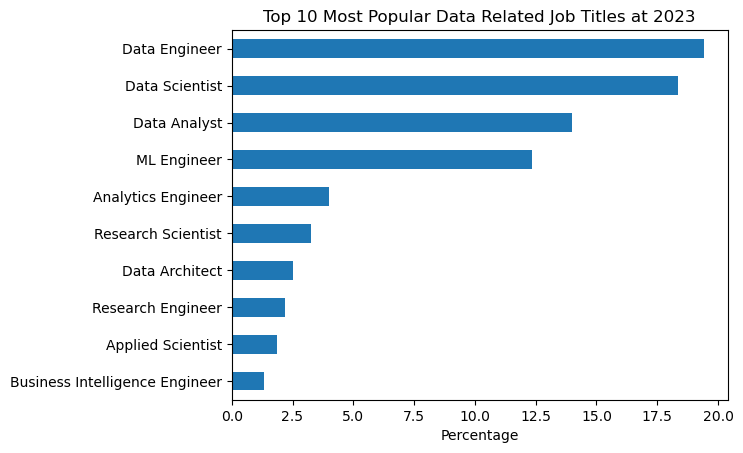

In [17]:
df.replace('Machine Learning Engineer','ML Engineer',inplace=True)
Job_Title_chart = df[df.work_year == 2023].job_title.value_counts(normalize=True).head(10) * 100
print(pd.DataFrame({'Job Title': Job_Title_chart.index, 'Percentage': Job_Title_chart.values}))
Job_Title_chart.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Most Popular Data Related Job Titles at 2023')
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

Analyzing Experience Level

EN: Entry-level / Junior

MI: Mid-level / Intermediate

SE: Senior-level / Expert

EX: Executive-level / Director

  Experience Level  Percentage
0               SE   64.518014
1               MI   23.894839
2               EN    7.439143
3               EX    4.148004


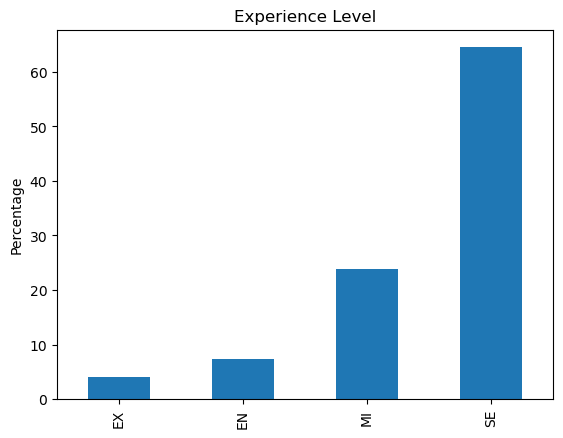

In [18]:
Experience_level_data = df.experience_level.value_counts(normalize=True) * 100
print(pd.DataFrame({'Experience Level': Experience_level_data.index, 'Percentage': Experience_level_data.values}))
Experience_level_data.sort_values(ascending=True).plot(kind='bar')
plt.title('Experience Level')
plt.xlabel(None)
plt.ylabel('Percentage')
plt.show()

About Employment Type

FT: Full-Time

CT: Contract

PT: Part-Time

FL: Freelance

In [19]:
emp_type_data = df.employment_type.value_counts(normalize=True) * 100
pd.DataFrame({'Type': emp_type_data.index, 'Percentage': emp_type_data.values })

,Type,Percentage
0,FT,99.143135
1,CT,0.370010
2,PT,0.253165
3,FL,0.233690


About Work Model

0: No remote work (less than 20%)

50: Partially remote/hybrid

100: Fully remote (more than 80%)

   Type  Percentage
0     0   53.339825
1   100   42.434275
2    50    4.225901


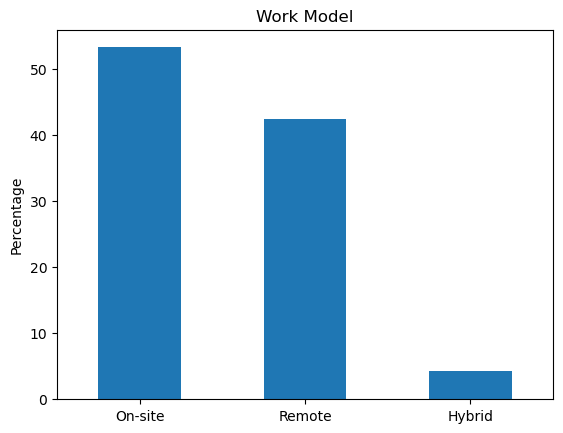

In [20]:
work_model_data = df.remote_ratio.value_counts(normalize=True) * 100
print(pd.DataFrame({'Type': work_model_data.index, 'Percentage': work_model_data.values }))
work_model_data.plot(kind='bar')

plt.title('Work Model')
plt.ylabel('Percentage')
plt.xlabel(None)
plt.xticks([0, 1, 2], ['On-site', 'Remote', 'Hybrid'], rotation = 0)
plt.show()

                        Job Title  Avg Salary
0   Analytics Engineering Manager   399880.00
1          Data Science Tech Lead   375000.00
2  Managing Director Data Science   300000.00
3              AWS Data Architect   258000.00
4            Cloud Data Architect   250000.00
5                    AI Architect   233656.00
6        Director of Data Science   215447.63
7    Data Infrastructure Engineer   201375.42
8           Data Science Director   201000.00
9        Head of Machine Learning   198103.00


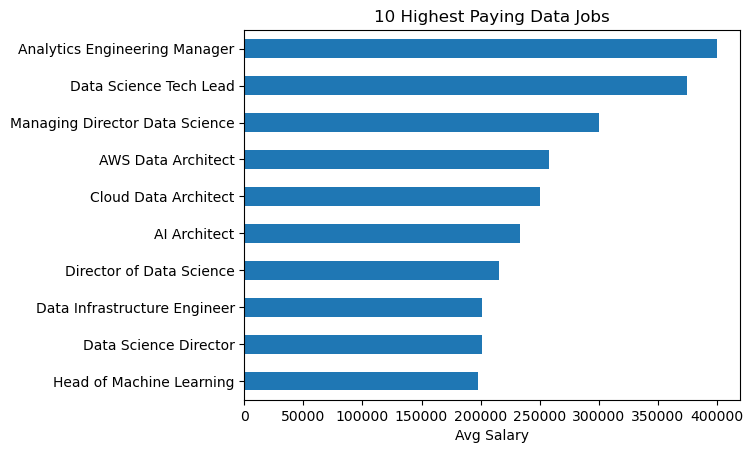

In [22]:
salary_data = df.groupby('job_title')['salary_in_usd'].mean().round(2).nlargest(10)
print(pd.DataFrame({'Job Title': salary_data.index, 'Avg Salary': salary_data.values }))
salary_data.sort_values(ascending=True).plot(kind='barh')
plt.title('10 Highest Paying Data Jobs')
plt.xlabel('Avg Salary')
plt.ylabel(None)
plt.show()